# Escalator Binary Classification Project

In this project, we intend to build a model that can recognize whether there may be any dangerous objects in close proximity to the escalator. 

Dangerous objects include items such as wheeled or large pieces of luggage, strollers and wheelchairs.

This is helpful as many injuries can be prevented as we can train computers to warn people before they put themselves in an unsafe situation.

## Importing Libraries

In [1]:
import cv2
from IPython.display import Image
from IPython.core.display import HTML 
import keras
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, Flatten, GlobalAveragePooling2D
from keras import backend as K
from keras import optimizers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

Using TensorFlow backend.


### ResNet-50 Model

We will be using the ResNet-50 model as a base.

In [3]:
from keras.applications import ResNet50
K.set_learning_phase(1)

base_model = ResNet50(include_top=False, weights="imagenet", input_shape=(224, 224, 3))

x = base_model.output

x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False
    
    if layer.name.startswith('bn'):
        layer.call(layer.input, training=False)

Instructions for updating:
Colocations handled automatically by placer.


C:\Users\IXZ708\AppData\Local\Continuum\miniconda3\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


### Model Summary

In [4]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

## Data Sample

Before preprocessing the images and converting them into an array of numbers that can be trained, the dataset needs some slight adjustments. In order to resolve the issue of asymmetric data and incorporate balance into the sample, random images from the larger ‘Safe’ class were selected using a random number generator to match the size of the smaller ‘Unsafe’ class. Although this significantly reduced the size of the overall dataset, it is critical that both classes are fairly represented to prevent the possibility of yielding a misleading accuracy rate.

656 'Safe' Images + 656 'Unsafe' Images = 1312 Total Images

In [5]:
train = pd.read_csv('Downloads/Escalator Final Labels.csv')
train.head()

,Image Name,Label,Safe,Unsafe
0,escalator_720.jpg,Safe,1,0
1,escalator_2413.jpg,Safe,1,0
2,escalator_2373.jpg,Safe,1,0
3,escalator_2253.jpg,Safe,1,0
4,escalator_203.jpg,Safe,1,0


## Loading and Converting Dataset

Here we resize the images, convert them into arrays, crop them using NumPy slicing to enhance focus on the area of interest before appending them onto the set of training images.

#### Cropping
The images are cropped using NumPy slicing to:
- Enhance focus on area of interest
- Remove any distracting background activity

In [6]:
train_image = []

for i in tqdm(range(train.shape[0])):
    img = image.load_img(r"C:\Users\IXZ708\Downloads\Sorted Escalators\\"+train['Label'][i]+"\\"+train['Image Name'][i],target_size=(250,500,3))
    img = image.img_to_array(img)
    cropped_img = img[12:236, 134:358]
    cropped_img = cropped_img/255.0
    train_image.append(cropped_img)
    
X = np.array(train_image)

100%|██████████████████████████████████████████████████████████████████████████████| 1312/1312 [01:10<00:00, 21.27it/s]


In [7]:
X.shape

(1312, 224, 224, 3)

In [8]:
y = np.array(train.drop(['Image Name','Label'], axis=1))
y.shape

(1312, 2)

## Split Training and Validation Set

Here we split the dataset into training and validation sets at a 9:1 ratio.

1180 Training + 132 Validation = 1312 Total Images

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

In [10]:
model.compile(loss = "categorical_crossentropy", optimizer = optimizers.SGD(lr=0.0001, momentum=0.9), metrics=["accuracy"])

## Training the Model

In [11]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)

Instructions for updating:
Use tf.cast instead.
Train on 1180 samples, validate on 132 samples
Epoch 1/10
1180/1180 [==============================] - ETA: 4:03 - loss: 0.7181 - acc: 0.500 - ETA: 3:15 - loss: 0.7182 - acc: 0.437 - ETA: 2:54 - loss: 0.7248 - acc: 0.427 - ETA: 2:48 - loss: 0.7258 - acc: 0.453 - ETA: 2:39 - loss: 0.7199 - acc: 0.456 - ETA: 2:31 - loss: 0.7231 - acc: 0.447 - ETA: 2:25 - loss: 0.7330 - acc: 0.424 - ETA: 2:17 - loss: 0.7385 - acc: 0.425 - ETA: 2:11 - loss: 0.7429 - acc: 0.427 - ETA: 2:08 - loss: 0.7445 - acc: 0.415 - ETA: 2:03 - loss: 0.7364 - acc: 0.440 - ETA: 1:59 - loss: 0.7360 - acc: 0.442 - ETA: 1:53 - loss: 0.7418 - acc: 0.430 - ETA: 1:48 - loss: 0.7365 - acc: 0.442 - ETA: 1:42 - loss: 0.7308 - acc: 0.452 - ETA: 1:38 - loss: 0.7315 - acc: 0.449 - ETA: 1:33 - loss: 0.7297 - acc: 0.446 - ETA: 1:28 - loss: 0.7278 - acc: 0.458 - ETA: 1:23 - loss: 0.7262 - acc: 0.458 - ETA: 1:18 - loss: 0.7246 - acc: 0.459 - ETA: 1:12 - loss: 0.7260 - acc: 0.455 - ETA: 1:07

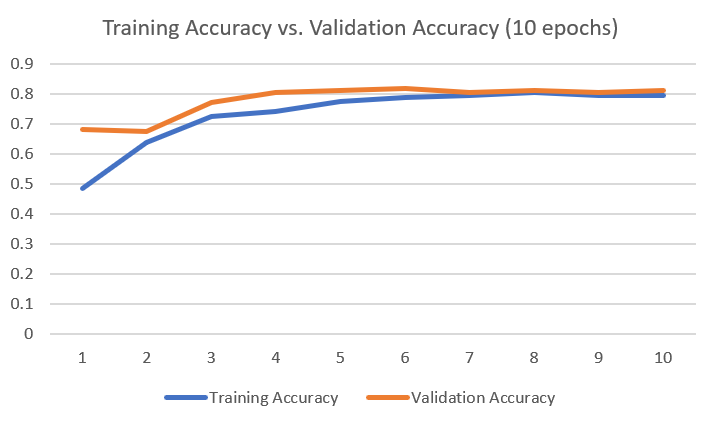

In [15]:
Image(filename = r"Pictures/graph - 10.PNG", width=600, height=600)

The model stabilizes at a validation accuracy of 81%. We might try running more epochs to see if the accuracy will further increase.

## Making Predictions

Using 10 random new images to test whether the model is able to correctly classify the image as safe or unsafe.

In [12]:
image_names = ['Safe/escalator_234','Safe/escalator_495','Safe/escalator_1039','Safe/escalator_548','Safe/escalator_1514',
               'Unsafe/Other/escalator_508','Unsafe/Other/escalator_093','Unsafe/Other/escalator_1345','Unsafe/escalator_1588', 
               'Unsafe/Other/escalator_098']

Creating functions to test the images and reveal probabilities.

- Use get_proba to get labels AND confidence levels.
- Use get_label to get label ONLY.

In [26]:
def get_proba(cropped_test_img):
    classes = np.array(train.columns[2:])
    proba = model.predict(cropped_test_img.reshape(1,224,224,3))
    safe_or_unsafe = np.argsort(proba[0])[:-3:-1]
    
    text = ""
    for i in range(2):
        text += "{}".format(classes[safe_or_unsafe[i]])+" ({:.3})".format(proba[0][safe_or_unsafe[i]])+" "
    
    return text
    
def get_label(cropped_test_img):
    classes = np.array(train.columns[2:])
    proba = model.predict(cropped_test_img.reshape(1,224,224,3))
    safe_or_unsafe = np.argsort(proba[0])[:-3:-1]
    
    text = "{}".format(classes[safe_or_unsafe[0]])
    return text

def test_image(img):
    test_resized = cv2.resize(img, (500,250))
    img = image.img_to_array(test_resized)
    cropped_test_img = img[12:236, 134:358]
    cropped_test_img = cropped_test_img/255.0
    
    plt.imshow(cropped_test_img)
    plt.xlabel(get_label(cropped_test_img))

#### Results

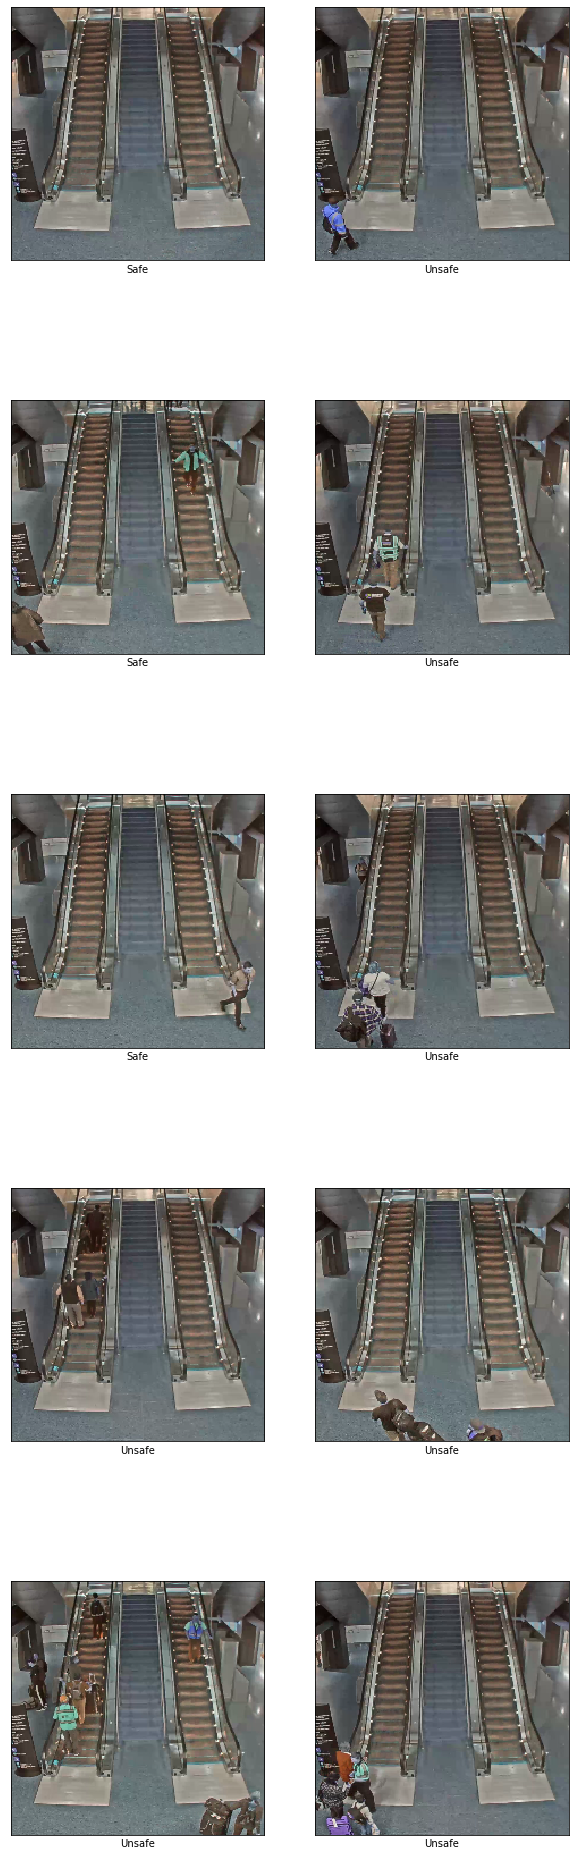

In [27]:
plt.figure(figsize=(10,35))
for i in range(len(image_names)):
    img = cv2.imread('Downloads/Sorted Escalators/'+image_names[i]+'.jpg')
    plt.subplot(5,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    test_image(img)

80% (8/10) of the images have been correctly classified.

## Improving Accuracy
Although this model is not ideal, the accuracy can certainly be further improved by:
- Running more iterations
- Implementing a arger dataset
- Changing the parameters
- Augmenting the data (stretch, resize, add filters)

## References

- https://www.tensorflow.org/tutorials/keras/basic_classification
- https://www.analyticsvidhya.com/blog/2019/04/build-first-multi-label-image-classification-model-python/
- https://github.com/keras-team/keras/issues/9214